In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [21]:
def fractal_sequence(x,y,max_iterations,func,R,c=None):
        '''
        Determine number of iterations required to reach a point outside the given radius
        Inputs: x,y--the starting point
                func defines the dynamical system, z_(n+1) = func(z_n,c)
                R--radius threshold for divergence
                max_iterations--maximum number of iterations allowed before stopping
                c--value of c in dynamical system equation
        '''
        #mandelbrot
        if c is None:
            c = x + y*1j
            z = 0

        #julia
        else:
             z = x + y*1j
        
        #iterate until sequence diverges or reaches max number of iterations
        num_iterations = 0
        while num_iterations < max_iterations:
            z = func(z,c) 
            if np.abs(z) > R:
                break 
            num_iterations += 1
        return num_iterations

def julia_generator(func,R,x_lim=[-1.8,.6],y_lim=[-1.2,1.2],N=100,max_iterations=200,cmap="Greys",c=None):
    '''
    Inputs: func defines the dynamical system, z_(n+1) = func(z_n,c)
            R--radius threshold for divergence
            x_lim,y_lim--plotting window
            N--grid resolution is NxN
            max_iterations--maximum number of iterations allowed before stopping
            c--value of c in dynamical system equation
    Plots the julia/mandelbrot set
    '''

    #initialize coordinates and grid
    x_coordinates = np.linspace(x_lim[0],x_lim[1],N)
    y_coordinates = np.linspace(y_lim[0],y_lim[1],N)
    grid = np.zeros((N,N))

    #calculate number of iterations required for divergence at each grid point
    for index_x in range(len(x_coordinates)):
        for index_y in range(len(y_coordinates)):
            x,y = x_coordinates[index_x],y_coordinates[index_y]
            num_iterations = fractal_sequence(x,y,max_iterations,func,R,c)
            grid[index_y][index_x] = num_iterations
    
    #show fractal plot
    plt.imshow(grid,cmap=cmap,norm=LogNorm())
    plt.axis('off')

# Mandelbrot Set

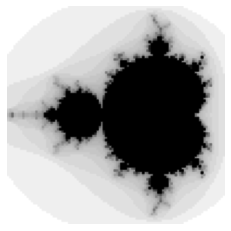

In [18]:
mandelbrot_func = lambda z,c: np.power(z,2) + c 
mandelbrot_R = 2
julia_generator(mandelbrot_func,mandelbrot_R)

# A Few Julia Sets

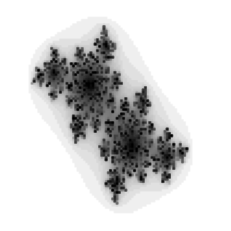

In [11]:
julia_func = lambda z,c: np.power(z,2) + c
julia_R = 2
julia_generator(x_lim=[-1.8,2],y_lim=[-1.2,1.2],func=julia_func,R=julia_R,
c=-.4+.6j,cmap="Greys")

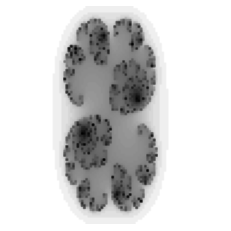

In [12]:
julia_func = lambda z,c: np.power(z,2) + c
julia_R = 2
julia_generator(x_lim=[-1.8,2],y_lim=[-1.2,1.2],func=julia_func,R=julia_R,
c=.285+.01j,cmap="Greys")

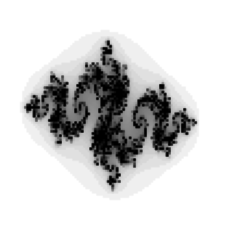

In [13]:
julia_func = lambda z,c: np.power(z,2) + c
julia_R = 2
julia_generator(x_lim=[-1.8,2],y_lim=[-1.2,1.2],func=julia_func,R=julia_R,
c=-.8+.156j)

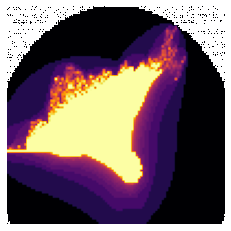

In [16]:
burningShip_func = lambda z,c: np.power(np.abs(np.real(z)) + 1j*np.abs(np.imag(z)),2) + c
burningShip_R = 2
julia_generator(x_lim=[-1.8,1.8],y_lim=[-2,1],func=burningShip_func,R=burningShip_R,cmap="inferno")

# Mandlebrot and Pi

### For the Mandelbrot dynamical system, for the starting point $z=-{\tfrac {3}{4}}+i\varepsilon $, as $\varepsilon \rightarrow 0$, the product of the number of iterations required for divergence and $\varepsilon $ approaches $\pi$.

In [26]:
epsilons = np.power(10.0,-np.arange(1,8))
iterations = [fractal_sequence(-.75,epsilon,float("inf"),mandelbrot_func,2) for epsilon in epsilons]
table = pd.DataFrame({"Epsilon":epsilons,"NumIterations":iterations})
table["Product"] = table["Epsilon"]*table["NumIterations"]
table["Error"] = np.abs(table["Product"]-np.pi)
display(table)

,Epsilon,NumIterations,Product,Error
0,1.000000e-01,32,3.200000,5.840735e-02
1,1.000000e-02,314,3.140000,1.592654e-03
2,1.000000e-03,3142,3.142000,4.073464e-04
3,1.000000e-04,31416,3.141600,7.346410e-06
4,1.000000e-05,314159,3.141590,2.653590e-06
5,1.000000e-06,3141592,3.141592,6.535898e-07
6,1.000000e-07,31415926,3.141593,5.358979e-08


# 2d Random Walk

In [92]:
def random_walk_sequence(grid,N):
     x,y = N,N
     num_iterations = 0
     while 0 <= x and x < 2*N and 0 <= y and y < 2*N:
          grid[x][y] = num_iterations
          rand_int = np.random.randint(0,4)
          if rand_int == 0:
               x += 1
          elif rand_int == 1:
               x -= 1
          elif rand_int == 2:
               y -= 1
          elif rand_int == 3:
               y += 1
          num_iterations += 1

def random_walk_2d_generator(N=500,cmap="inferno"):

    grid = np.zeros((2*N,2*N))
    random_walk_sequence(grid,N)
    plt.imshow(grid,cmap=cmap)
    plt.axis('off')


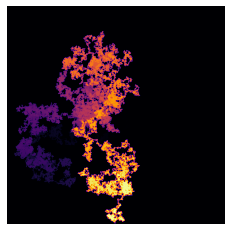

In [89]:
random_walk_2d_generator()

# Koch Snowflake

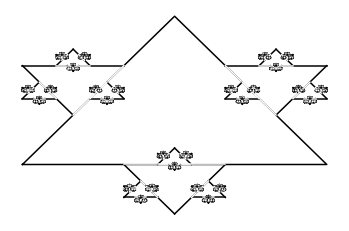

In [13]:
def snowFlake_generator(num_levels):

    def helper(vertices,level):

        if level == num_levels:
            return
        sides = [[vertices[0],vertices[1],vertices[2]],
                [vertices[0],vertices[2],vertices[1]],
                [vertices[1],vertices[2],vertices[0]]]
        for side in sides:

            start,end,opposite_vertex = side
            x_start,y_start = start
            x_end,y_end = end
            opposite_vertex_x,opposite_vertex_y = opposite_vertex

            x_mid,y_mid = (x_start + x_end)/2,(y_start + y_end)/2
            
            x_third,y_third = (2*x_start + x_end)/3,(2*y_start + y_end)/3
            x_twothird,y_twothird = (x_start + 2*x_end)/3,(y_start + 2*y_end)/3

            length = np.sqrt(np.power(x_twothird - x_third,2) + np.power(y_twothird - y_third,2))
            height = length*ROOT3_OVER2

            orientation_x,orientation_y = x_mid - opposite_vertex_x,y_mid - opposite_vertex_y
            normalizer = np.sqrt(np.power(orientation_x,2) + np.power(orientation_y,2))
            unit_orientation_x,unit_orientation_y = orientation_x/normalizer,orientation_y/normalizer
            x_vertex_3,y_vertex_3 = x_mid + height*unit_orientation_x,y_mid + height*unit_orientation_y

            plt.plot([x_third,x_vertex_3],[y_third,y_vertex_3],color="k")
            plt.plot([x_twothird,x_vertex_3],[y_twothird,y_vertex_3],color="k")
            plt.plot([x_twothird,x_third],[y_twothird,y_third],color="white")

            vertices = [[x_vertex_3,y_vertex_3],[x_third,y_third],[x_twothird,y_twothird]]
            helper(vertices,level+1)

    ROOT3_OVER2 = np.sqrt(3)/2
    vertices = [[0,0],[.5,ROOT3_OVER2],[1,0]]

    plt.plot([vertex[0] for vertex in vertices]+[vertices[0][0]],[vertex[1] for vertex in vertices]+[vertices[0][1]],color='k')
    helper([[0,0],[.5,ROOT3_OVER2],[1,0]],0)
    plt.axis('off')
snowFlake_generator(7)
                

# Sierpinski Carpet

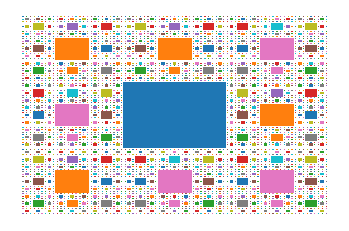

In [17]:
def sierpinski_carpet(num_levels = 9):

    def helper(x_center,y_center,a,level):

        if level == num_levels:
            return
        size = a/3
        vertices = [[x_center-size/2,y_center-size/2],
                    [x_center-size/2,y_center+size/2],
                    [x_center+size/2,y_center+size/2],
                    [x_center+size/2,y_center-size/2]]
        plt.fill([vertex[0] for vertex in vertices],[vertex[1] for vertex in vertices])
        
        for delta_x in [-1,0,1]:
            for delta_y in [-1,0,1]:
                if delta_x == 0 and delta_y == 0:
                    continue
                x_center_new, y_center_new = x_center + delta_x*size,y_center+ delta_y*size
                helper(x_center_new, y_center_new,size,level+1)
     
    helper(0,0,1,0)
    plt.axis('off')
sierpinski_carpet(5)
                


# T-Square Fractal

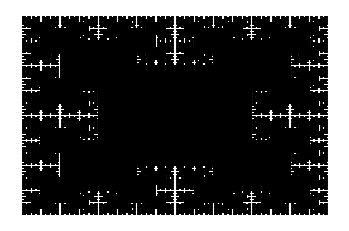

In [32]:
def T_square(num_levels = 9):

    def helper(x_center,y_center,a,level):

        if level == num_levels:
            return
        a /= 2
        vertices = [[x_center-a,y_center-a],
                    [x_center-a,y_center+a],
                    [x_center+a,y_center+a],
                    [x_center+a,y_center-a]]
        plt.fill([vertex[0] for vertex in vertices],[vertex[1] for vertex in vertices],color="k")
        
        for vertex in vertices:
            helper(vertex[0],vertex[1],a,level+1)
     
    helper(0,0,1,0)
    plt.axis('off')
T_square(7)

# Lyapunov Fractal

In [71]:
def Lyapunov_fractal(base_string,N,num_repeats):

    s = base_string*num_repeats
    grid =  np.zeros((N,N))
    
    for index_x in range(N):
        a = 4*index_x/N
        for index_y in range(N):
            b = 4*index_y/N
            R = np.array([a if char == "A" else b for char in s])
            X = np.ones(len(R))*.5
            for index in range(1,len(R)):
                X[index] = X[index-1]*(1-X[index-1])*R[index-1]
            grid[index_y][index_x] = np.mean(np.log(.0001 + np.abs(R[1:]*(1-2*X[1:]))))
    plt.imshow(grid,cmap="RdBu")
    plt.axis('off')

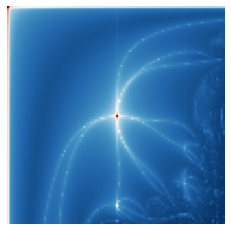

In [72]:
Lyapunov_fractal("AABAB",100,20)

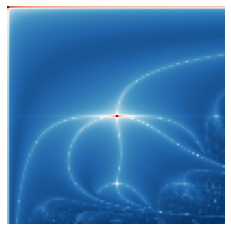

In [70]:
Lyapunov_fractal("BAB",100,20)

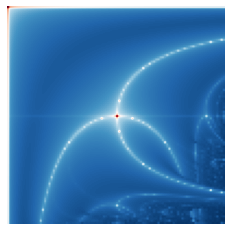

In [74]:
Lyapunov_fractal("BA",100,20)

In [25]:
class Circle:

    def __init__(self,center,radius,orientation=1):
        self.center = center
        self.radius = radius
        self.curvature = 1/radius*orientation
        self.orientation = orientation
        
    
    def draw(self):
        circle = plt.Circle(self.center, self.radius, color='k',fill=False,clip_on=False)
        ax.add_patch(circle)

    @staticmethod
    def is_tangent(circle1,circle2):

        #ensure circle2 is the outer circle, if there is an outer circle
        if circle1.orientation == -1:
            circle1,circle2 = circle2,circle1
        
        #euclidian distance between the centers
        distance_centers = np.sqrt(np.power(circle1.center[0]-circle2.center[0],2) + np.power(circle1.center[1]-circle2.center[1],2))
        
        #sum of the radii
        sum_radii = circle1.radius + circle2.radius
    
        #no outer circle
        if circle2.orientation == 1:
            return np.abs(distance_centers - sum_radii) < .00001
        
        #circle2 is outer and circle1 is inner
        else:
            return np.abs(distance_centers + circle1.radius - circle2.radius) < .00001
    

def Apollonian_gasket(circle1,circle2,circle3):

    def draw_circle(circle1,circle2,circle3):

        k1,k2,k3 = circle1.curvature,circle2.curvature,circle3.curvature 
        factor1 = k1+k2+k3
        factor2 = 2*np.sqrt(k1*k2 + k1*k3 + k2*k3)
        
        k4 = factor1 + factor2
        r4 = 1/k4

        epsilon = .001
        if r4 < epsilon:
            return
        
        z1,z2,z3 = complex(*circle1.center),complex(*circle2.center),complex(*circle3.center)
        
        factor1 = z1*k1+z2*k2+z3*k3 
        factor2 = 2*np.sqrt(k1*k2*z1*z2+k1*k3*z1*z3+k2*k3*z2*z3)

        z4_pos = (factor1+factor2)/k4
        z4_neg = (factor1 - factor2)/k4

        center4_pos = z4_pos.real,z4_pos.imag
        center4_neg = z4_neg.real,z4_neg.imag

        circle4_pos = Circle(center4_pos,r4)
        if Circle.is_tangent(circle4_pos,circle1) and Circle.is_tangent(circle4_pos,circle2) and Circle.is_tangent(circle4_pos,circle3):
            circle4_pos.draw()
            draw_circle(circle1,circle2,circle4_pos)
            draw_circle(circle1,circle3,circle4_pos)
            draw_circle(circle2,circle3,circle4_pos)

        circle4_neg = Circle(center4_neg,r4)
        if Circle.is_tangent(circle4_neg,circle1) and Circle.is_tangent(circle4_neg,circle2) and Circle.is_tangent(circle4_neg,circle3):
            circle4_neg.draw()
            draw_circle(circle1,circle2,circle4_neg)
            draw_circle(circle1,circle3,circle4_neg)
            draw_circle(circle2,circle3,circle4_neg)
        
    circle1.draw()
    circle2.draw()
    circle3.draw()
    draw_circle(circle1,circle2,circle3)

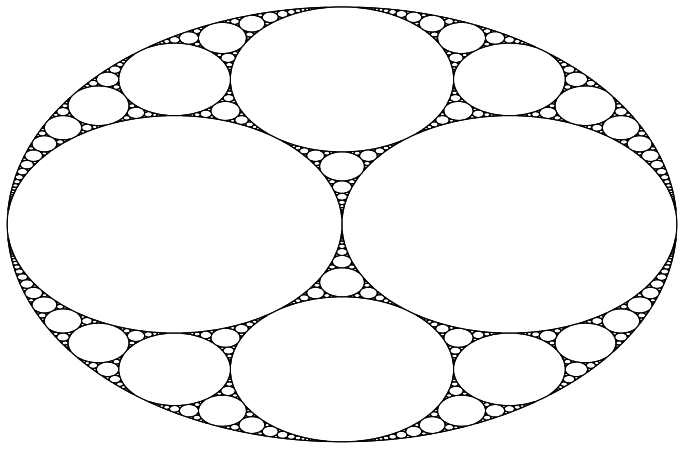

In [26]:
fig, ax = plt.subplots() 
plt.axis('off')
circle1,circle2,circle3 = Circle([.5,0],.5),Circle([-.5,0],.5),Circle([0,0],1,-1)
Apollonian_gasket(circle1,circle2,circle3)

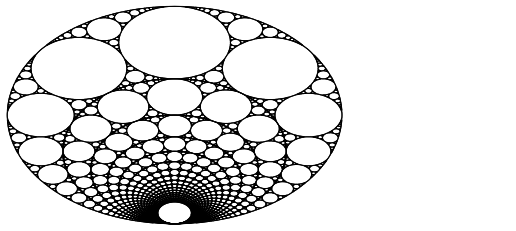

In [28]:
def generate_sequential_gaskets(N):

    global fig, ax
    fig, ax = plt.subplots()
    plt.axis('off')
    for n in range(2,N):
        r1,r2 = 1/n,1/(n+1)
        circle1,circle2,circle3 = Circle([0,r2+r1],r1*r2),Circle([0,-r1*r2+r1],r2),Circle([0,0+r1],r1,-1)
        Apollonian_gasket(circle1,circle2,circle3)
    plt.show() 


generate_sequential_gaskets(20)

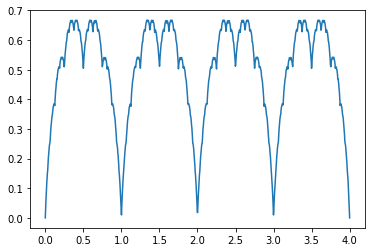

In [79]:
def Takagi_Landsberg_curve(N,w,a,b,M):

    def blanc(x):
        S = np.power(2.0,np.arange(N,dtype=float))*x
        S = np.abs(np.round(S)-S)
        return np.sum(S*w_coordinates)
      
    x_coordinates = np.linspace(a,b,M)
    w_coordinates = np.power(w,np.arange(N,dtype=float))
    y_coordinates = [blanc(x) for x in x_coordinates]

    plt.plot(x_coordinates,y_coordinates)
    plt.show()

Takagi_Landsberg_curve(300,.5,0,4,1000)